In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import requests

In [4]:
import io
from io import StringIO

In [5]:
url = 'https://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

source = requests.get(url).text

poll_data = StringIO(source)

In [6]:
poll_df = pd.read_csv(poll_data)

In [7]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [8]:
poll_df.describe()

,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration
count,564.000000,586.000000,586.000000,423.000000,202.000000,0.0,586.0
mean,1296.679078,46.805461,44.614334,6.550827,3.376238,NaN,1.0
std,1621.268369,2.422058,2.906180,3.701754,2.692726,NaN,0.0
min,328.000000,37.000000,32.000000,1.000000,0.000000,NaN,1.0
25%,855.000000,45.000000,43.000000,4.000000,2.000000,NaN,1.0
50%,1000.000000,47.000000,45.000000,6.000000,3.000000,NaN,1.0
75%,1500.000000,48.000000,46.750000,8.000000,4.000000,NaN,1.0
max,36472.000000,54.000000,53.000000,28.000000,19.000000,NaN,1.0


In [9]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


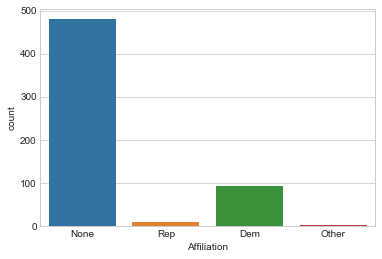

In [10]:
sns.countplot('Affiliation', data=poll_df)

# Most of the pollster were neutral, however, a significant number showed support for democrats

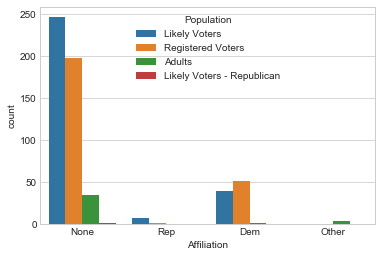

In [11]:
sns.countplot('Affiliation', data=poll_df, hue='Population')

In [12]:
avg = pd.DataFrame(poll_df.mean())

avg.drop('Number of Observations', axis=0, inplace=True)

avg.drop('Question Text', axis=0, inplace=True)

avg.drop('Question Iteration', axis=0, inplace=True)

In [13]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


In [14]:
std = pd.DataFrame(poll_df.std())

std.drop('Number of Observations', axis=0, inplace=True)

std.drop('Question Text', axis=0, inplace=True)

std.drop('Question Iteration', axis=0, inplace=True)

In [15]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


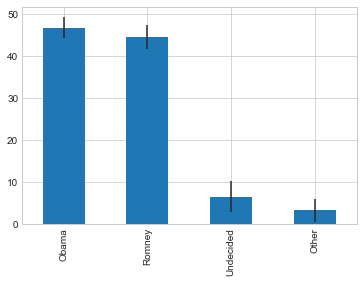

In [16]:
avg.plot(yerr = std, kind='bar', legend=False)

# From the plot it can be seen that the support for both candidates was very close in terms of number
# Undecided voters could easily influence the end result

In [17]:
poll_avg = pd.concat([avg,std], axis=1)

In [18]:
poll_avg.columns = ['Average', 'STD']

In [19]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


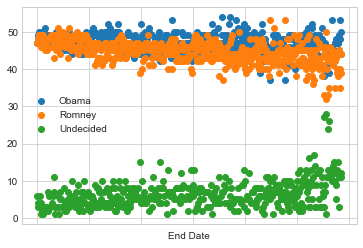

In [20]:
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], linestyle='', marker = 'o')

# The plot towards the left is of earlier dates which shows that several voters were undecided
# As election time got closer, they were more decided. Romney's support increased significantly

In [21]:
from datetime import datetime

In [22]:
poll_df['difference'] = (poll_df.Obama - poll_df.Romney)/100

In [23]:
poll_df.head()

# A positive value in difference means more support for Obaama and vice versa

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


In [25]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


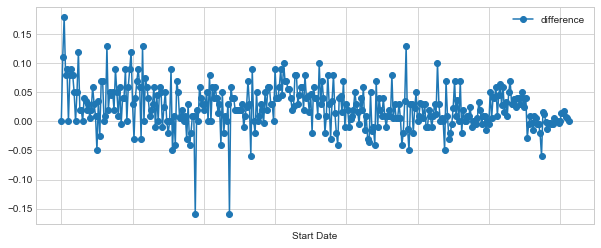

In [26]:
poll_df.plot('Start Date', 'difference', figsize=(10,4), marker='o')

# As can be seen many of the markers lie above 0 which means more support for Obama

In [27]:
# To find the impact of debates that took place in Oct 2012 on the election process 

row_in = 0
xlimit=[]

for date in poll_df['Start Date']:
    if date[:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
        
    else:
        row_in += 1
print(min(xlimit))
print(max(xlimit))

325
352


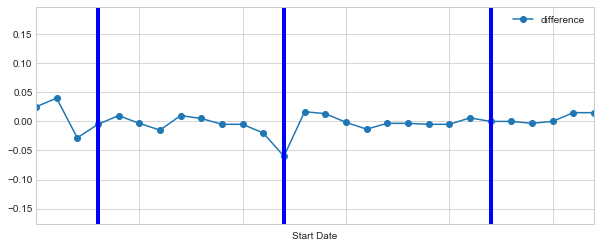

In [28]:
poll_df.plot('Start Date', 'difference', figsize=(10,4), marker='o', xlim=(325,352))

# to plot a line for debate dates which tool place on Oct 3,12, and 22
plt.axvline(x=325+3, linewidth=4, color='blue')
plt.axvline(x=325+12, linewidth=4, color='blue')
plt.axvline(x=325+22, linewidth=4, color='blue')

# Obama gained support after 1st debate, Romney after 2nd and it was neutal in the 3rd

In [29]:
# Alternatively we could have found the index location manually and set up a new database with those values only 
deb_df = poll_df.iloc[325:353]

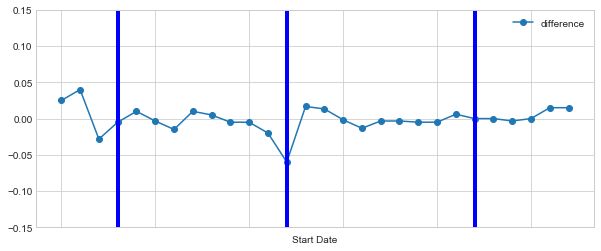

In [30]:
deb_df.plot('Start Date', 'difference', figsize=(10,4), marker='o', ylim=(-0.15,0.15))

plt.axvline(x=3, linewidth=4, color='blue')
plt.axvline(x=12, linewidth=4, color='blue')
plt.axvline(x=22, linewidth=4, color='blue')

In [31]:
# Now analyzing Donor dataset

donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [32]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [33]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [34]:
# To calculate the sum of donations received by candidates we use the following
# Filter is applied to show relevant column only and the values are sorted by in a descending order

donor_df.groupby('cand_nm')[['contb_receipt_amt']].sum().sort_values('contb_receipt_amt', ascending=False)

,contb_receipt_amt
cand_nm,
"Obama, Barack",1.335026e+08
"Romney, Mitt",8.521925e+07
"Paul, Ron",2.072257e+07
"Perry, Rick",1.841151e+07
"Gingrich, Newt",1.201183e+07
"Santorum, Rick",1.072809e+07
"Cain, Herman",7.047265e+06
"Pawlenty, Timothy",4.255054e+06
"Huntsman, Jon",3.204350e+06


In [35]:
# Now to find avg donation
# Avg donation amount was around $300
donor_df.contb_receipt_amt.mean()

298.2351500951093

In [36]:
# Now to find STD
# STD was around $3750
donor_df.contb_receipt_amt.std()

3749.666723269043

In [37]:
# Max donation by any person was around $2014490
donor_df.contb_receipt_amt.max()

2014490.51

In [38]:
# Negative amount of dontation here is alarming
donor_df.contb_receipt_amt.min()

-30800.0

In [39]:
# Most common amount of donation was 100, 50 and 25
donor_df.contb_receipt_amt.value_counts().head()

100.0    178188
50.0     137584
25.0     110345
250.0     91182
500.0     57984
Name: contb_receipt_amt, dtype: int64

In [40]:
# Now to investigate the -ve values in the df

top_donor = donor_df['contb_receipt_amt'].copy()

top_donor.sort_values().head()

114604   -30800.0
226986   -25800.0
101356    -7500.0
398429    -5500.0
250737    -5455.0
Name: contb_receipt_amt, dtype: float64

In [41]:
# To get rid of all the negative values
top_donor = top_donor[top_donor>0]

In [42]:
top_donor.sort_values().head()

335573    0.01
335407    0.01
335352    0.01
324596    0.01
329896    0.01
Name: contb_receipt_amt, dtype: float64

In [43]:
# Now to find avg donation again
# Avg donation amount went up from $300 to $312
top_donor.mean()

312.19279683292285

In [44]:
# Now to find STD again
# STD rose slightly from $3750 to $3764
top_donor.std()

3764.4829284761277

In [45]:
# To find how much donations each party got we do the following
# This method didn't work as cand_nm is an index here

party_db = donor_df.groupby('cand_nm')[['contb_receipt_amt']].sum().sort_values('contb_receipt_amt', ascending=False)

In [46]:
party_db

,contb_receipt_amt
cand_nm,
"Obama, Barack",1.335026e+08
"Romney, Mitt",8.521925e+07
"Paul, Ron",2.072257e+07
"Perry, Rick",1.841151e+07
"Gingrich, Newt",1.201183e+07
"Santorum, Rick",1.072809e+07
"Cain, Herman",7.047265e+06
"Pawlenty, Timothy",4.255054e+06
"Huntsman, Jon",3.204350e+06


In [47]:
'''Tried using this method, apparently it doesn't work with index

def party(name):
    if name == 'Obama, Barack':
        return 'Democrat'
    else:
        return 'Republican'

party_db['party'] = party_db['cand_nm'].apply(party)'''

"Tried using this method, apparently it doesn't work with index\n\ndef party(name):\n    if name == 'Obama, Barack':\n        return 'Democrat'\n    else:\n        return 'Republican'\n\nparty_db['party'] = party_db['cand_nm'].apply(party)"

In [48]:
party_map = {'Obama, Barack': 'Democrat',
            'Romney, Mitt': 'Republican',
            'Paul, Ron': 'Republican',
            'Perry, Rick': 'Republican',
            'Gingrich, Newt': 'Republican',
            'Santorum, Rick': 'Republican',
            'Cain, Herman': 'Republican',
            'Pawlenty, Timothy': 'Republican',
            'Huntsman, Jon': 'Republican',
            'Bachmann, Michelle': 'Republican',
            'Johnson, Gary Earl': 'Republican',
            "Roemer, Charles E. 'Buddy' III": 'Republican',
            'McCotter, Thaddeus G': 'Republican'}

donor_df['party'] = donor_df.cand_nm.map(party_map)

In [49]:
# Other way to map these out would be to call this

'''
for i in range(0, len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama, Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\nfor i in range(0, len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama, Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

In [65]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [54]:
# Just like in case of series we can pass on a boolean to filter out the data to eliinate negative values
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

In [56]:
# Earlier the negative amounts were still there when we calculated donations for candidates.

ind_don = donor_df.groupby('cand_nm')[['contb_receipt_amt']].sum().sort_values('contb_receipt_amt', ascending=False)

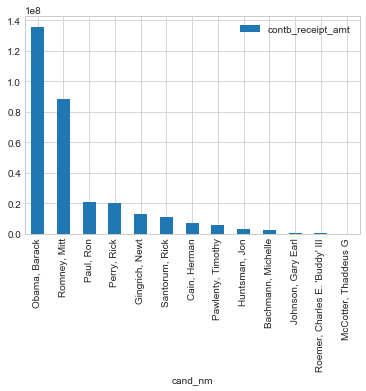

In [58]:
ind_don.plot(kind='bar')

In [53]:
pt_don = donor_df.groupby('party')[['contb_receipt_amt']].sum().sort_values('contb_receipt_amt', ascending=False)

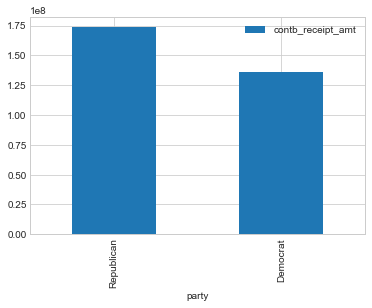

In [59]:
pt_don.plot(kind='bar')

In [61]:
# Now to create a dataframe based on occupations we can apply pivot_table
# Here indexing is done by occupation, party is used as column, and values come from 'contb_receipt_amt'
# Sum is applied to sum all the donations
occ_df = donor_df.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')

In [63]:
occ_df.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [68]:
occ_df.shape

# Total number of occupations reported are 45067

(45067, 2)

In [69]:
occ_df = occ_df[occ_df.sum(1) > 1000000]

In [72]:
occ_df.shape

(31, 2)

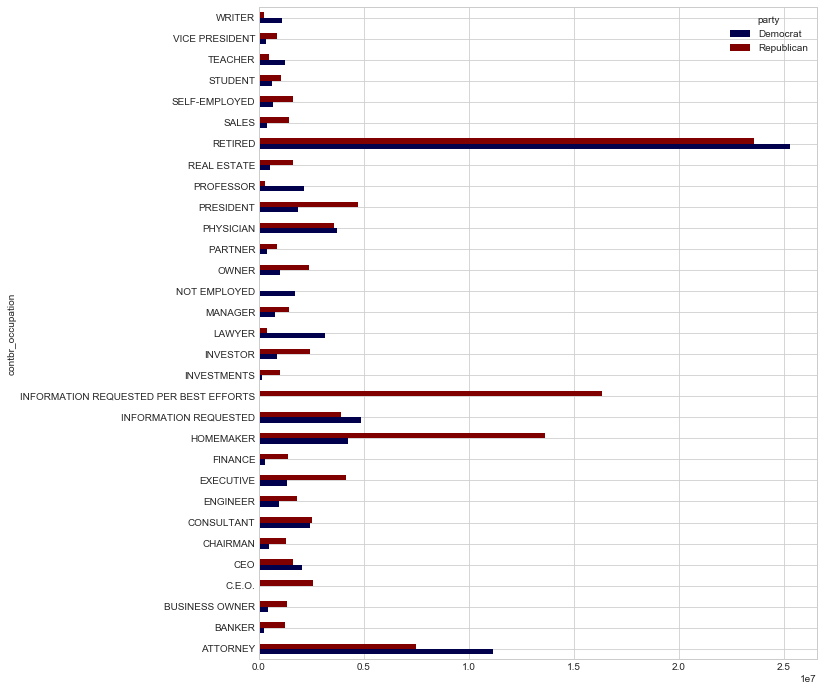

In [81]:
# We use 'barh' in kind to plot is horizontally 
occ_df.plot(kind='barh', figsize=(10,12), cmap='seismic')

In [83]:
# There are two undefined occupations in the above and one repeated - CEO

occ_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'], axis=0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [87]:
occ_df.loc['CEO'] = occ_df.loc['CEO'] + occ_df.loc['C.E.O.']

occ_df.drop('C.E.O.', inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


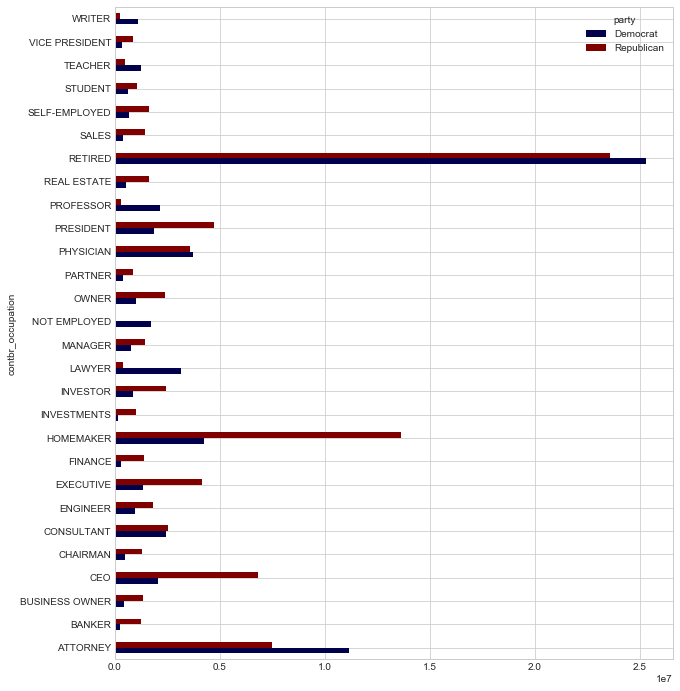

In [88]:
occ_df.plot(kind='barh', figsize=(10,12), cmap='seismic')